In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df = df.dropna()


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.select_dtypes(include="object").columns:
    df[col] = encoder.fit_transform(df[col])

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

In [8]:
X = df.drop("Sleep Duration", axis=1).values
y = df["Sleep Duration"].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [11]:
def linear_regression_train(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [12]:
def linear_regression_predict(X, theta):
    return X @ theta

In [13]:
theta = linear_regression_train(X_train_b, y_train)
theta

array([-0.00225053, -0.7138128 ,  0.09131017,  1.1537806 ,  0.08027934,
        0.34522977,  0.28998004, -0.17069942, -0.21171718, -0.08877872,
       -0.05888194, -0.51900237,  0.11417162])

In [14]:
y_pred = linear_regression_predict(X_test_b, theta)

In [15]:
mse = np.mean((y_pred - y_test) ** 2)

In [16]:
rmse = np.sqrt(mse)

In [17]:
ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_res = np.sum((y_test - y_pred)**2)
r2 = 1 - (ss_res / ss_total)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 0.07296473990002025
RMSE: 0.27011986209832894
R2 Score: 0.9254471932496608


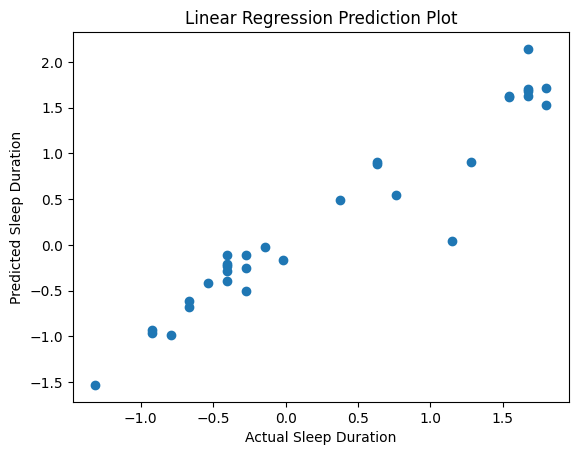

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sleep Duration")
plt.ylabel("Predicted Sleep Duration")
plt.title("Linear Regression Prediction Plot")
plt.show()

In [19]:
def ridge_regression(X, y, lam=0.1):
    I = np.eye(X.shape[1])
    I[0,0] = 0
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta

In [20]:
def lasso_regression(X, y, lr=0.001, epochs=1000, lam=0.1):
    theta = np.zeros(X.shape[1])

    for _ in range(epochs):
        y_pred = X @ theta
        gradient = -(2/X.shape[0]) * (X.T @ (y - y_pred))
        theta -= lr * (gradient + lam * np.sign(theta))

    return theta

In [21]:
def elastic_net(X, y, lr=0.001, epochs=1000, l1=0.1, l2=0.1):
    theta = np.zeros(X.shape[1])

    for _ in range(epochs):
        y_pred = X @ theta
        gradient = -(2/X.shape[0]) * (X.T @ (y - y_pred))
        theta -= lr * (gradient + l1 * np.sign(theta) + l2 * theta)

    return theta